<a href="https://colab.research.google.com/github/TheTalesman/ml-notebooks/blob/main/prophet_yfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Install yfinance

In [1]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 5.5 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=e66bc89eb0db4f95f6ca9c30a95bd0291f34041fdb61b1847154ca8349251114
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


# Forecasting Stocks from Yahoo Finance with Prophet

In [2]:
import yfinance as yf

# berkshire hathaway inc. (b stock)
brk = yf.Ticker('BRK-B')

hist = brk.history(period="max", auto_adjust=True)

hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-05-09,22.200001,24.400000,22.200001,23.200001,4290000,0,0.0
1996-05-10,24.000000,24.200001,23.600000,24.000000,1060000,0,0.0
1996-05-13,24.000000,24.100000,23.299999,23.900000,700000,0,0.0
1996-05-14,24.000000,24.100000,23.100000,23.600000,310000,0,0.0
1996-05-15,23.600000,23.700001,23.000000,23.200001,545000,0,0.0
...,...,...,...,...,...,...,...
2021-09-09,278.910004,280.109985,278.369995,278.609985,3683700,0,0.0
2021-09-10,279.970001,279.970001,277.489990,277.600006,4552300,0,0.0
2021-09-13,278.359985,280.839996,277.820007,279.920013,4601900,0,0.0


In [3]:
import pandas as pd

df = pd.DataFrame()

df['ds'] = hist.index
df['y'] = hist['Close'].values

df.tail()

,ds,y
6377,2021-09-09,278.609985
6378,2021-09-10,277.600006
6379,2021-09-13,279.920013
6380,2021-09-14,277.200012
6381,2021-09-15,278.179993


In [4]:
from fbprophet import Prophet

m = Prophet(daily_seasonality=False)

m.fit(df)

In [5]:
future = m.make_future_dataframe(365, freq='D')

forecast = m.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
6740,2022-09-09,272.466628,258.814876,287.116669
6741,2022-09-10,275.889333,262.520101,289.508199
6742,2022-09-11,275.895312,261.693571,290.247946
6743,2022-09-12,272.290411,259.690694,286.476661
6744,2022-09-13,272.400862,258.605468,286.701610
6745,2022-09-14,272.429456,258.401998,286.424030
6746,2022-09-15,272.419196,258.604716,285.964781


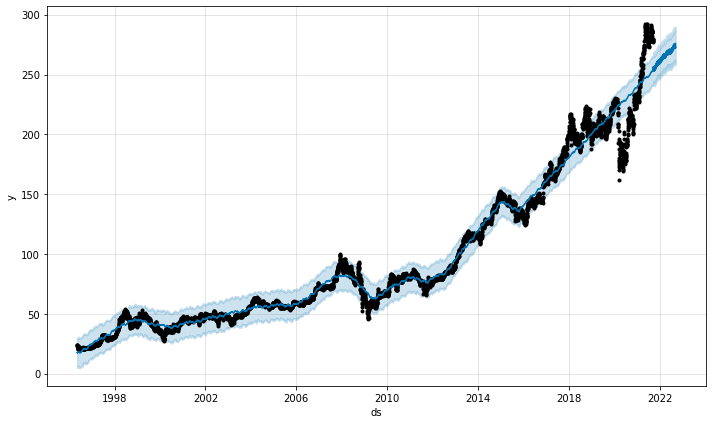

In [6]:
m.plot(forecast);

## Make it a Function

In [7]:
def make_forecast(ticker, periods, hist='max'):
    """
    forecast the given ticker (stock) period days into the future (from today)

    inputs
    ------
    > ticker
        >> ticker of stock to forecast
    > periods
        >> number of days into the future to forecast (from today's date)
    > hist
        >> amount of historical data to consider
            > default: max
            > options: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
    """
    # pull historical data from yahoo finance
    stock_data = yf.Ticker(ticker)

    hist_data = stock_data.history(hist, auto_adjust=True)

    # create new dataframe to hold dates (ds) & adjusted closing prices (y)
    df = pd.DataFrame()

    df['ds'] = hist_data.index.values
    df['y'] = hist_data['Close'].values

    # create a Prophet model from that data
    m = Prophet(daily_seasonality=False)
    m.fit(df)

    future = m.make_future_dataframe(periods, freq='D')

    forecast = m.predict(future)

    m.plot(forecast)

    return forecast

#### Make some Forecasts with that Function

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-05-05,14.677603,13.583244,15.468397,14.677603,14.677603,-0.135826,-0.135826,-0.135826,-0.087611,-0.087611,-0.087611,-0.048215,-0.048215,-0.048215,0.0,0.0,0.0,14.541777
1,2017-05-08,14.675992,13.693943,15.593194,14.675992,14.675992,-0.098086,-0.098086,-0.098086,-0.088975,-0.088975,-0.088975,-0.009111,-0.009111,-0.009111,0.0,0.0,0.0,14.577906
2,2017-05-09,14.675455,13.625200,15.556462,14.675455,14.675455,-0.075821,-0.075821,-0.075821,-0.081410,-0.081410,-0.081410,0.005589,0.005589,0.005589,0.0,0.0,0.0,14.599634
3,2017-05-10,14.674918,13.597701,15.540898,14.674918,14.674918,-0.076478,-0.076478,-0.076478,-0.097338,-0.097338,-0.097338,0.020859,0.020859,0.020859,0.0,0.0,0.0,14.598440
4,2017-05-11,14.674381,13.642289,15.626904,14.674381,14.674381,-0.053875,-0.053875,-0.053875,-0.090430,-0.090430,-0.090430,0.036555,0.036555,0.036555,0.0,0.0,0.0,14.620506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,2022-03-10,25.167919,23.309198,25.903767,24.315255,26.018045,-0.506091,-0.506091,-0.506091,-0.090430,-0.090430,-0.090430,-0.415661,-0.415661,-0.415661,0.0,0.0,0.0,24.661828
1275,2022-03-11,25.185890,23.256494,25.980871,24.325981,26.044422,-0.605843,-0.605843,-0.605843,-0.087611,-0.087611,-0.087611,-0.518232,-0.518232,-0.518232,0.0,0.0,0.0,24.580047
1276,2022-03-12,25.203861,23.425486,26.162764,24.338722,26.073794,-0.396084,-0.396084,-0.396084,0.222881,0.222881,0.222881,-0.618965,-0.618965,-0.618965,0.0,0.0,0.0,24.807778
1277,2022-03-13,25.221833,23.285986,26.092003,24.348789,26.101653,-0.493568,-0.493568,-0.493568,0.222881,0.222881,0.222881,-0.716449,-0.716449,-0.716449,0.0,0.0,0.0,24.728264


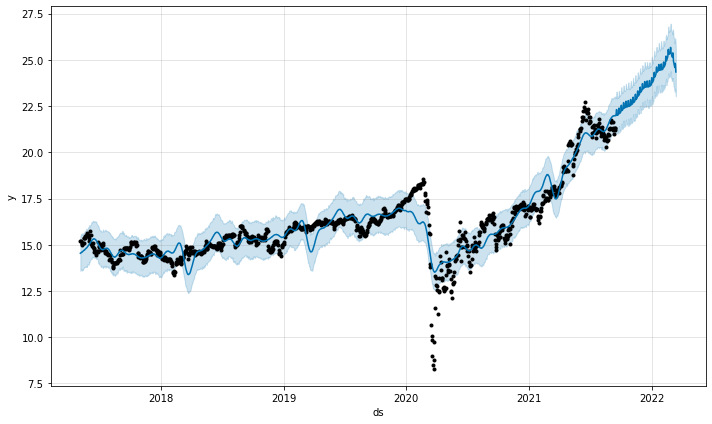

In [8]:
# kkr real estate finance trust
make_forecast('KREF', 180)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2470,2023-09-11,88.151880,17.768313,148.914978,19.691054,150.395280,-1.008937,-1.008937,-1.008937,0.826707,0.826707,0.826707,-1.835644,-1.835644,-1.835644,0.0,0.0,0.0,87.142943
2471,2023-09-12,88.212844,20.888214,150.870813,19.520395,150.605105,-0.928667,-0.928667,-0.928667,0.891766,0.891766,0.891766,-1.820433,-1.820433,-1.820433,0.0,0.0,0.0,87.284176
2472,2023-09-13,88.273807,17.506803,150.869656,19.349737,150.810369,-0.968076,-0.968076,-0.968076,0.831906,0.831906,0.831906,-1.799983,-1.799983,-1.799983,0.0,0.0,0.0,87.305730
2473,2023-09-14,88.334770,18.239105,150.587421,19.180944,151.052319,-0.810204,-0.810204,-0.810204,0.964202,0.964202,0.964202,-1.774405,-1.774405,-1.774405,0.0,0.0,0.0,87.524566
2474,2023-09-15,88.395733,18.926293,150.869386,19.012319,151.492311,-0.776474,-0.776474,-0.776474,0.967624,0.967624,0.967624,-1.744097,-1.744097,-1.744097,0.0,0.0,0.0,87.619259


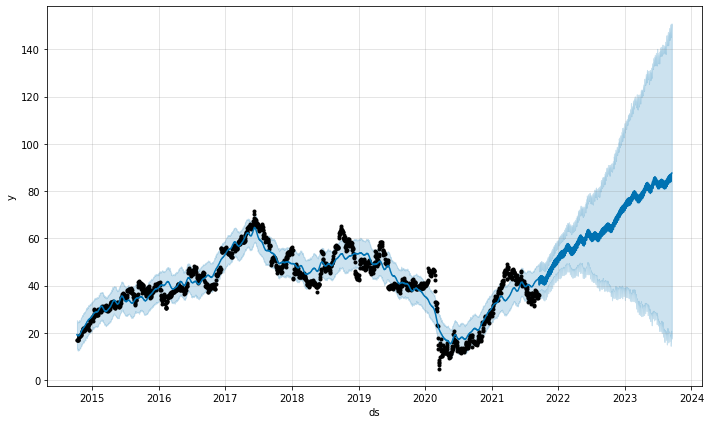

In [9]:
# dave & buster's
make_forecast('PLAY', 365 * 2).tail()

,ds,yhat,yhat_lower,yhat_upper
1144,2021-09-16,75.766197,72.537273,78.920492
1145,2021-09-17,76.122796,72.662906,79.574913
1146,2021-09-18,77.198468,73.948472,80.609552
1147,2021-09-19,77.306222,74.046593,80.755205
1148,2021-09-20,76.253399,72.948996,79.677760
...,...,...,...,...
1504,2022-09-11,122.650290,106.269427,140.714500
1505,2022-09-12,121.707271,105.655032,140.140824
1506,2022-09-13,121.895143,105.552368,140.134105
1507,2022-09-14,122.103635,105.766566,140.671778


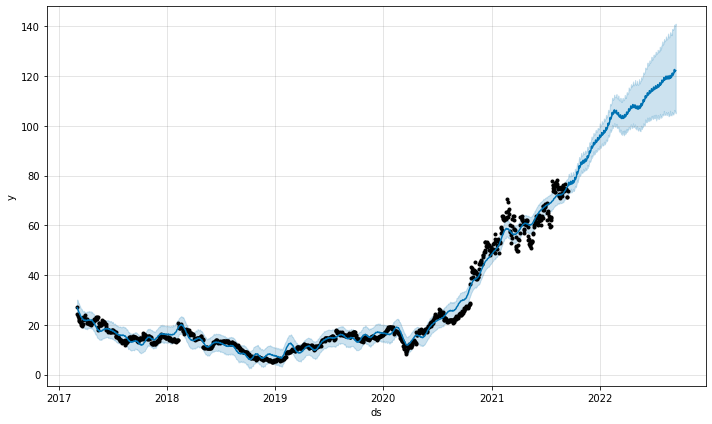

In [10]:
n = 365  # set variable for number of days to predict

# snapchat
snap_forecast = make_forecast('SNAP', n)

# only keep the future forecast, and forget most columns
snap_forecast = snap_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(n)

snap_forecast